
**№17.152**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def function(x,y):
    return x ** 2 + 3 * y ** 2 + np.cos(x + y)

def Gradient(x, y):
    return np.array([2 * x - np.sin(x + y), 6 * y - np.sin(x + y)])

In [151]:
def f(x0, y0, hx0, hy0, a):
    return (x0 + a * hx0) ** 2 + 3 * (y0 + a * hy0) ** 2 + np.cos((x0 + a * hx0)  + (y0 + a * hy0))

def ff(a):
    return f(x0, y0, hx0, hy0, a)

def df(x0, y0, hx0, hy0, a):  
    return 2 * hx0 * (x0 + a * hx0) + 6 * hy0 * (y0 + a * hy0) - (hx0 + hy0) * np.sin((x0 + a * hx0) +(y0 + a * hy0))

def dff(a):
    return df(x0, y0, hx0, hy0, a)

In [156]:
def Search_Alpha(a, b):
        
        while abs(b - a) > 1e-3:

            if dff(a) >= 0:
                return a

            elif dff(b) <= 0:
                return b

            else:
                C = (ff(a) - ff(b) + b * dff(b) - a * dff(a)) / (dff(b) - dff(a))

                if dff(C) > 0:
                    b = C
                else:
                    a = C      
        return C

In [165]:
x0, y0 = -np.pi/4, np.pi/6
hx0, hy0 = -Gradient(x0, y0)
k = 0
steps = []
steps.append([x0, y0])

while np.sqrt(Gradient(x0, y0)[0] ** 2 + Gradient(x0, y0)[1] ** 2) < 1e-3:

    k += 1

    if k % 2 == 0:

        a = Search_Alpha(a = 0, b = 1)

        x1 = x0 + a * hx0
        y1 = y0 + a * hy0

        hx1 = -Gradient(x1, y1)[0]
        hy1 = -Gradient(x1, y1)[1]

    else:
        a = Search_Alpha(a = 0, b = 1)

        x1 = x0 + a * hx0
        y1 = y0 + a * hy0

        bk_chislitel = Gradient(x1, y1)[0] ** 2 + Gradient(x1, y1)[1] ** 2
        bk_znamenatel = Gradient(x0, y0)[0] ** 2 + Gradient(x0, y0)[1] ** 2
        bk = bk_chislitel / bk_znamenatel

        hx1 = -Gradient(x1, y1)[0] + hx0 * bk
        hy1 = -Gradient(x1, y1)[1] + hy0 * bk

    x0 = x1
    y0 = y1
    steps.append([x0, y0])

    hx0 = hx1
    hy0 = hy1

Text(0.5, 0, 'x2')

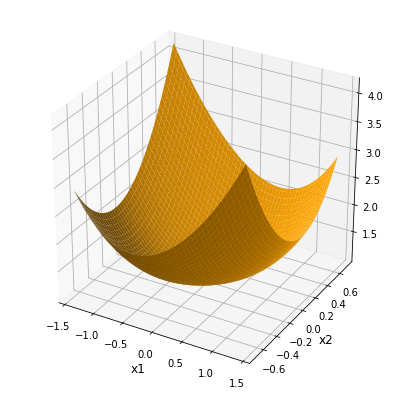

In [166]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

x = list(np.linspace(-1.4, 1.4, 100))
y = list(np.linspace(-0.7, 0.7, 100))
x, y = np.meshgrid(x, y)
z = function(x, y)

a = ax.plot_surface(x, y, z, color='orange')
ax.set_xlabel('x1', fontsize = 12)
ax.set_ylabel('x2', fontsize = 12)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
x = list(np.linspace(-1, 1, 100))
y = list(np.linspace(-0.6, 0.6, 100))
x, y = np.meshgrid(x, y)
z = function(x, y)
ax.contourf(x, y, z, 10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
steps = np.matrix(steps)
ax.plot(steps[:,0], steps[:,1], color='white')

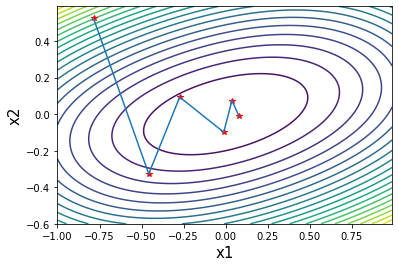